In [7]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
avg = 1
stdDev = .1
numReps = 5
numSimulations = 1000

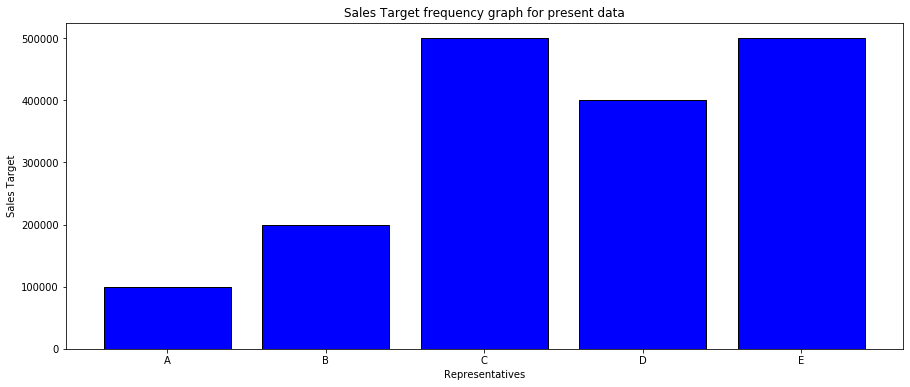

In [9]:
pctToTarget = np.random.normal(avg, stdDev, numReps).round(2)
salesTargetValues = [100000, 200000, 500000, 400000, 500000]
representatives = ['A', 'B', 'C', 'D', 'E']
salesTargetProb = [.3, .3, .2, .15, .05]
salesTarget = np.random.choice(salesTargetValues, numReps, p=salesTargetProb)
plt.figure(figsize=(15,6))
plt.bar(representatives, salesTargetValues, color = 'blue', edgecolor = 'black',)
plt.title("Sales Target frequency graph for present data")
plt.xlabel("Representatives")
plt.ylabel("Sales Target")

presentDataFrame = pd.DataFrame(index=range(numReps), data={'representatives': representatives,
                                               'salesTargetValues': salesTargetValues})
export_json = presentDataFrame.to_json(r'C:\Users\Aahad\Desktop\FYP\predictive-analytics\src\containers\phase1\Phase 1 JSON\5 Employees\salesfrequency.json')

In [10]:
df = pd.DataFrame(index=range(numReps), data={'Pct To Target': pctToTarget,
                                               'Sales Target': salesTarget})

df['Sales'] = df['Pct To Target'] * df['Sales Target']
df

,Pct To Target,Sales Target,Sales
0,0.95,200000,190000.0
1,1.04,200000,208000.0
2,1.02,200000,204000.0
3,1.02,100000,102000.0
4,0.88,400000,352000.0


In [11]:
def calc_commission_rate(x):
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [12]:
df['Commission Rate'] = df['Pct To Target'].apply(calc_commission_rate)
df['Commission Amount'] = df['Commission Rate'] * df['Sales']
df
df['Commission Amount'].sum()

33300.0

In [13]:
all_stats = []

for i in range(numSimulations):
    salesTarget = np.random.choice(salesTargetValues, numReps, p=salesTargetProb)

    pctToTarget = np.random.normal(avg, stdDev, numReps).round(2)

    df = pd.DataFrame(index=range(numReps), data={'Pct To Target': pctToTarget,
                                                   'Sales Target': salesTarget})

    df['Sales'] = df['Pct To Target'] * df['Sales Target']
    df['Commission Rate'] = df['Pct To Target'].apply(calc_commission_rate)
    df['Commission Amount'] = df['Commission Rate'] * df['Sales']

    all_stats.append([df['Sales'].sum().round(0),
                      df['Commission Amount'].sum().round(0),
                      df['Sales Target'].sum().round(0)])

In [14]:
resultsDf = pd.DataFrame.from_records(all_stats, columns=['Sales',
                                                           'Commission Amount',
                                                           'Sales Target'])
resultsDf.describe().style.format('{:,}')

,Sales,Commission Amount,Sales Target
count,"1,000.0","1,000.0","1,000.0"
mean,"1,363,222.0","46,292.26","1,366,900.0"
std,"352,894.8930227264","13,661.835361247671","347,556.01733416325"
min,"478,000.0","14,600.0","500,000.0"
25%,"1,113,750.0","36,787.5","1,100,000.0"
50%,"1,351,000.0","45,435.0","1,400,000.0"
75%,"1,609,250.0","55,040.0","1,600,000.0"
max,"2,580,000.0","95,800.0","2,500,000.0"


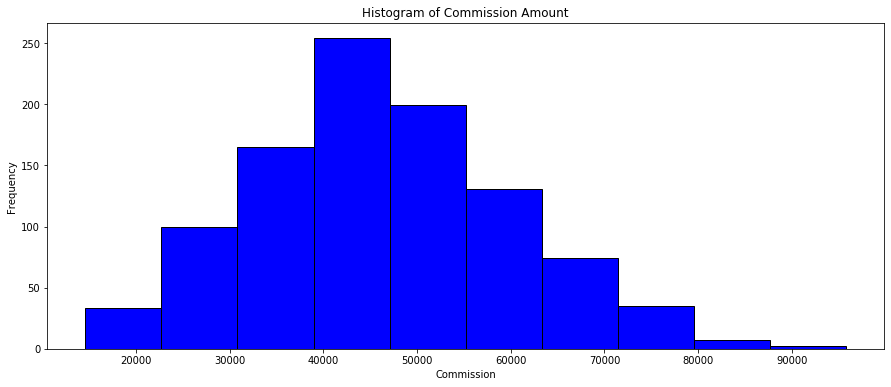

In [15]:
plt.figure(figsize=(15,6))
plt.title('Histogram of Commission Amount')
plt.xlabel('Commission')
plt.ylabel('Frequency')
plt.hist(resultsDf['Commission Amount'], color = 'blue', edgecolor = 'black',
         bins = int(len(resultsDf['Commission Amount'])/100));
export_json = resultsDf['Commission Amount'].to_json(r'C:\Users\Aahad\Desktop\FYP\predictive-analytics\src\containers\phase1\Phase 1 JSON\5 Employees\avgCommission.json')
